# $\color{Green}{\text{Fundamentals of Inference and Learning}}$ 
Name: Roduit \
Surname : Vincent \
Sciper: 325140
## Homework 2
### Exercise 1 : Classifying digits with Scikit-learn

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler

### 1) Import and prepare datas

In [255]:
#Load datas
from sklearn.datasets import load_digits
x,y = load_digits(return_X_y=True)

In [256]:
# Change the output to 0 if even and 1 if odd
y = [0 if i % 2 == 0 else 1 for i in y]

In [257]:
#split into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)

In [258]:
#Check proportion of 1 in train and test
prop1_train = np.sum(y_train)/len(y_train)
prop1_test = np.sum(y_test)/len(y_test)
print(f'The proportion of 1 in the train set is {prop1_train*100:.2f}%')
print(f'The proportion of 1 in the test set is {prop1_test*100:.2f}%')

The proportion of 1 in the train set is 50.26%
The proportion of 1 in the test set is 50.89%


### 2) Logistic Regression

In [259]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/len(y_test)
def f1_score(y_pred, y_test):
    tp = np.sum((y_pred == 1) & (y_test == 1))
    fp = np.sum((y_pred == 1) & (y_test == 0))
    fn = np.sum((y_pred == 0) & (y_test == 1))
    return 2*tp/(2*tp + fp + fn)

### Cross validation to fix hyperparamters
1) Case with $\mathscr{l}_1$ penalty

In [260]:
def function_evaluation(model,model_name, parameters, x_train, y_train, n_splits=5,x_test=x_test, y_test=y_test, scoring='accuracy'):
        #Create pipeline
        pipe = make_pipeline(StandardScaler(), model)
        #Create cross validation
        cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=1)
        #Create grid search
        grid = GridSearchCV(pipe, param_grid=parameters, cv=cv, scoring=scoring, return_train_score=True)
        #Fit model
        grid.fit(x_train, y_train)
        if model_name == 'logistic':
                cvOptParam = 1 / grid.best_params_['logisticregression__C']
                print(cvOptParam)
                tested_paramters = 1 / np.array(grid.cv_results_['param_logisticregression__C'].data)
                pipe.set_params(logisticregression__C=cvOptParam)
                y_pred = grid.predict(x_test)
                acc_pred = accuracy(y_pred, y_test)
        elif model_name == 'ridge':
                cvOptParam = 2 * grid.best_params_['ridgeclassifier__alpha']
                tested_paramters = 2 * np.array(grid.cv_results_['param_ridgeclassifier__alpha'].data)
                pipe.set_params(ridgeclassifier__alpha=cvOptParam)
                y_pred = grid.predict(x_test)
                acc_pred = accuracy(y_pred, y_test)
        elif model_name == 'svc':
                cvOptParam = 1 / grid.best_params_['linearsvc__C']
                tested_paramters = 1 / np.array(grid.cv_results_['param_linearsvc__C'].data)
                pipe.set_params(linearsvc__C=cvOptParam)
                y_pred = grid.predict(x_test)
                acc_pred = accuracy(y_pred, y_test)
        else:
                tested_paramters = np.array(grid.cv_results_['param_randomforestclassifier__n_estimators'].data)
                cvOptParam = grid.best_params_['randomforestclassifier__n_estimators']
                pipe.set_params(randomforestclassifier__n_estimators=cvOptParam)
                y_pred = grid.predict(x_test)
                acc_pred = accuracy(y_pred, y_test)
        
        trainAcc = grid.cv_results_['mean_train_score']
        testAcc = grid.cv_results_['mean_test_score']

        print(f'In this case, the optimal parameter is {cvOptParam:.2f} and the accuracy on test set is {acc_pred*100:.2f}%')    

        return tested_paramters, trainAcc, testAcc, cvOptParam, acc_pred
    

In [261]:
def display_result(tested_paramters, parameter_name, trainAcc, testAcc, cvOptParam, title):
    plt.figure(figsize=(10, 5))
    plt.plot(tested_paramters, trainAcc, 'o-', label='Train accuracy')
    plt.plot(tested_paramters, testAcc, 'o-', label='Test accuracy')
    plt.axvline(cvOptParam, color='r', linestyle='--', label='Optimal lambda')

    plt.title('Accuracy for different values of' + title)
    plt.xlabel(parameter_name)
    plt.ylabel('Accuracy')

    plt.semilogx()
    plt.xlim([tested_paramters[0], tested_paramters[-1]])

    plt.tight_layout()
    plt.legend()
    plt.show()

2.0691380811147893
In this case, the optimal parameter is 2.07 and the accuracy on test set is 92.89%


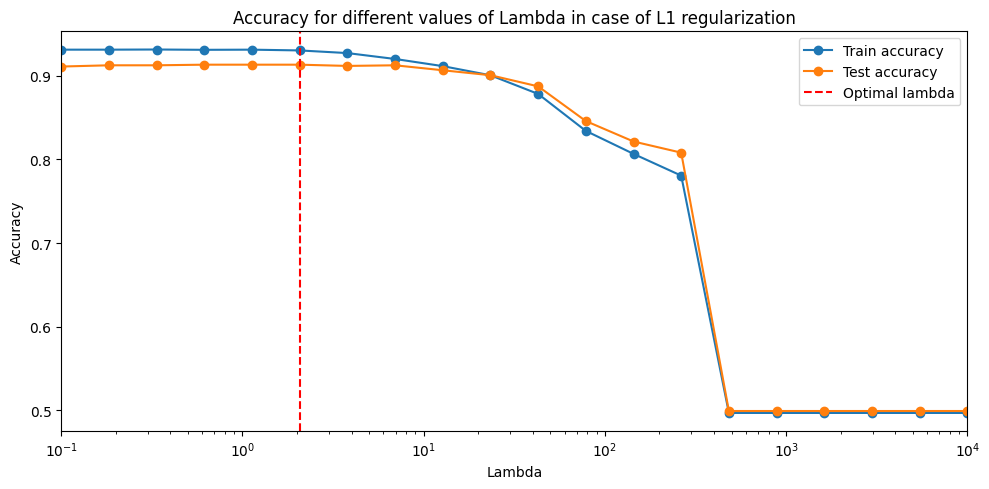

In [262]:
param_grid = [
    {'logisticregression__C': 1 / np.logspace(-1, 4, 20)}  #'C' is the inverse of lambda
]
logReg = LogisticRegression(penalty='l1', solver='liblinear')

tested_paramters_l1, trainAcc_l1, testAcc_l1, cvOptParam_l1, acc_l1 = function_evaluation(logReg,'logistic', param_grid, x_train, y_train)
display_result(tested_paramters_l1, 'Lambda', trainAcc_l1, testAcc_l1, cvOptParam_l1, ' Lambda in case of L1 regularization')

1) Case with $\mathscr{l}_2$ penalty

0.18329807108324356
In this case, the optimal parameter is 0.18 and the accuracy on test set is 93.78%


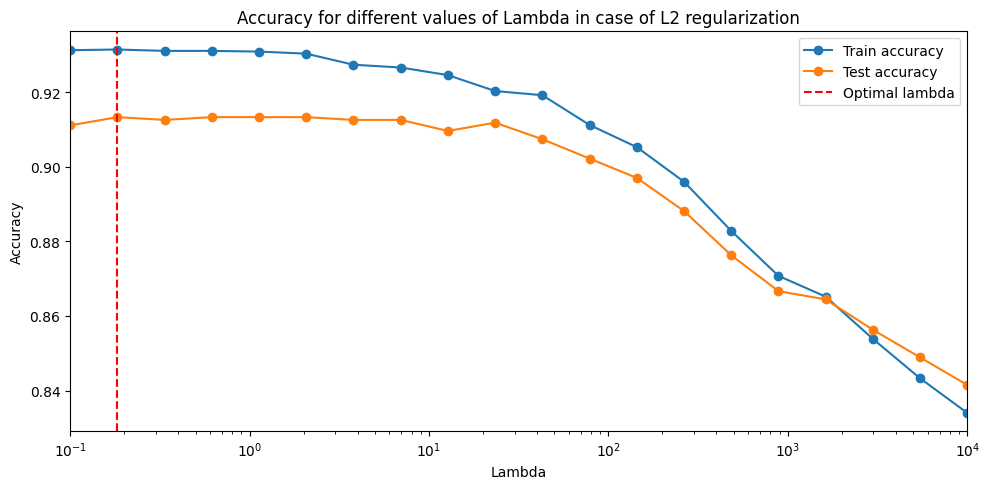

In [263]:
# perform a grid search to find the best parameter lambda

# Create a pipeline with logistic regression and scaling
logReg_l2 = LogisticRegression(penalty='l2', solver='liblinear')

# define the parameter grid
param_grid = [
    {'logisticregression__C': 1 / np.logspace(-1, 4, 20)}  #'C' is the inverse of lambda
]

tested_parameters_l2, trainAcc_l2, testAcc_l2, cvOptParam_l2, acc_l2 = function_evaluation(logReg_l2,'logistic', param_grid, x_train, y_train)
display_result(tested_parameters_l2, 'Lambda', trainAcc_l2, testAcc_l2, cvOptParam_l2, ' Lambda in case of L2 regularization')


Now let's find the prediction and the corresponding accuracy for the test set for the two logistic regressions:

In [264]:
print(f'For the L1 regularization, the accuracy on the test set is {acc_l1*100:.2f}%')
print(f'For the L2 regularization, the accuracy on the test set is {acc_l2*100:.2f}%')

For the L1 regularization, the accuracy on the test set is 92.89%
For the L2 regularization, the accuracy on the test set is 93.78%


3) Ridge and Hinge \
a) Ridge

In [265]:
from sklearn.linear_model import RidgeClassifier

In this case, the optimal parameter is 42.81 and the accuracy on test set is 92.00%


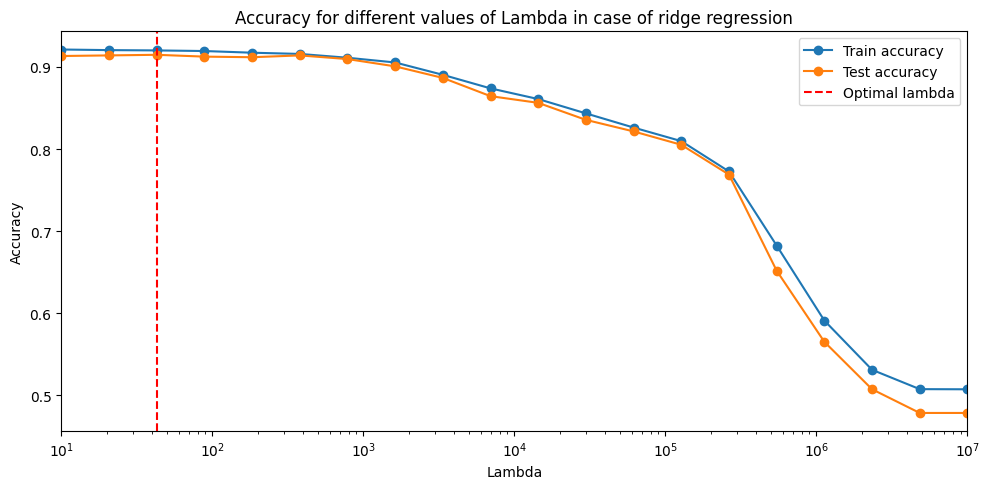

In [266]:
# Create a pipeline with Ridge regression and scaling
Ridge = RidgeClassifier()

# define the parameter grid
param_grid = [
    {'ridgeclassifier__alpha': np.logspace(1, 7, 20)/2} # alpha = 1/2C = lambda/2
]

tested_parameters_ridge, trainAcc_ridge, testAcc_ridge, cvOptParam_ridge, acc_ridge = function_evaluation(Ridge,'ridge', param_grid, x_train, y_train)
display_result(tested_parameters_ridge, 'Lambda', trainAcc_ridge, testAcc_ridge, cvOptParam_ridge, ' Lambda in case of ridge regression')

b) Hinge

In [267]:
from sklearn.svm import LinearSVC

In this case, the optimal parameter is 78.48 and the accuracy on test set is 92.67%


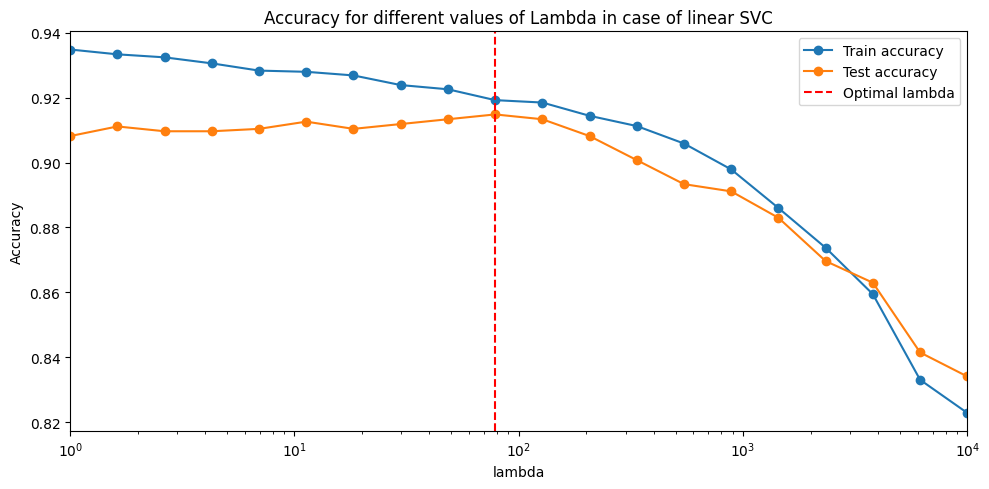

In [268]:
# Create a pipeline with LinearSVC and scaling
linear_svc = LinearSVC(loss='hinge', max_iter=100000)

param_grid = [
    {'linearsvc__C': 1 /np.logspace(0, 4, 20)}
]

tested_parameters_svc, trainAcc_svc, testAcc_svc, cvOptParam_svc, acc_svc = function_evaluation(linear_svc,'svc', param_grid, x_train, y_train)
display_result(tested_parameters_svc,'lambda', trainAcc_svc, testAcc_svc, cvOptParam_svc, ' Lambda in case of linear SVC')


In [269]:
print(f'For the Ridge case, the accuracy on the test set is {acc_ridge*100:.2f}%')
print(f'For the Hinge case, the accuracy on the test set is {acc_svc*100:.2f}%')

For the Ridge case, the accuracy on the test set is 92.00%
For the Hinge case, the accuracy on the test set is 92.67%


4. Random Forest

In this case, the optimal parameter is 784.00 and the accuracy on test set is 96.67%


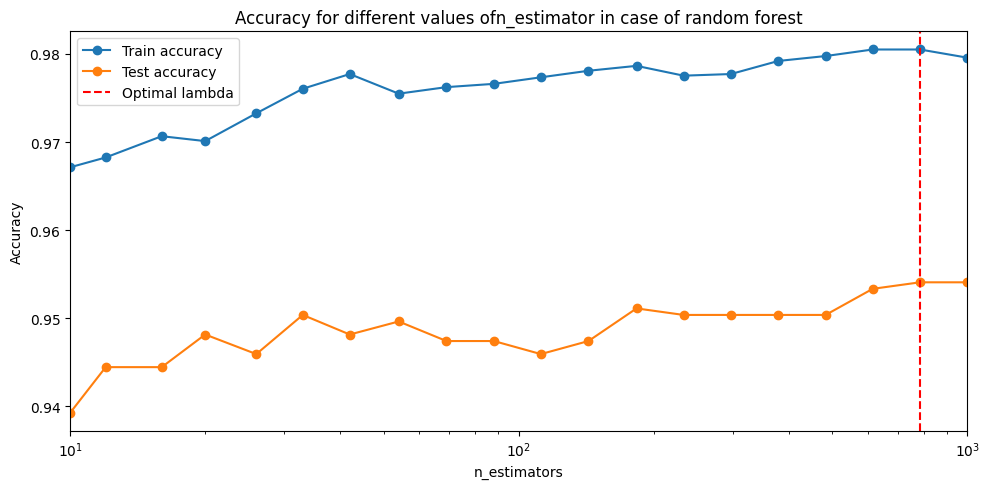

In [270]:
# Create a pipeline with LinearSVC and scaling
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=5, random_state=1, min_samples_split=5)

# define the parameter grid
param_grid = [
    {'randomforestclassifier__n_estimators': np.logspace(1, 3, 20).astype(int)}
]

tested_parameters_forest, trainAcc_forest, testAcc_forest, cvOptParam_forest, acc_forest = function_evaluation(random_forest,'forest', param_grid, x_train, y_train)
display_result(tested_parameters_forest, 'n_estimators', trainAcc_forest, testAcc_forest, cvOptParam_forest, 'n_estimator in case of random forest')



5. Random Feature

In [271]:
x_train.shape

(1347, 64)

In [272]:
# define the sigmoid function for numpy arrays
def sigmoid(x):
    x = np.array(x)
    return 1 / (1 + np.exp(-x))

In [273]:
#transform the data
def transform(X_train,X_test, D, d=x_train.shape[1]):
    F = np.random.normal(scale= 1/d, size=(D,d))
    U_train = 1 / np.sqrt(D) * sigmoid(F @ X_train.T).T
    U_test = 1 / np.sqrt(D) * sigmoid(F @ X_test.T).T
    return U_train, U_test

7.847599703514606e-05
In this case, the optimal parameter is 0.00 and the accuracy on test set is 98.00%


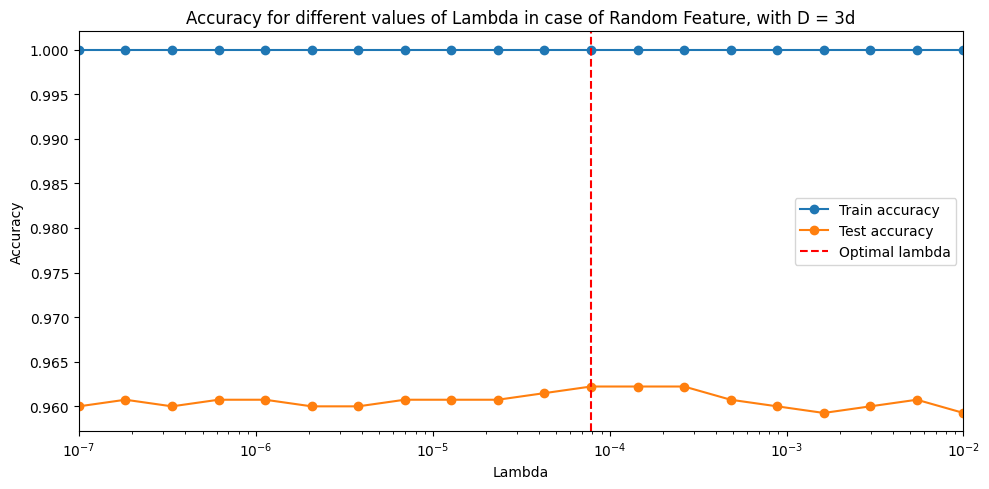

0.001623776739188721
In this case, the optimal parameter is 0.00 and the accuracy on test set is 98.44%


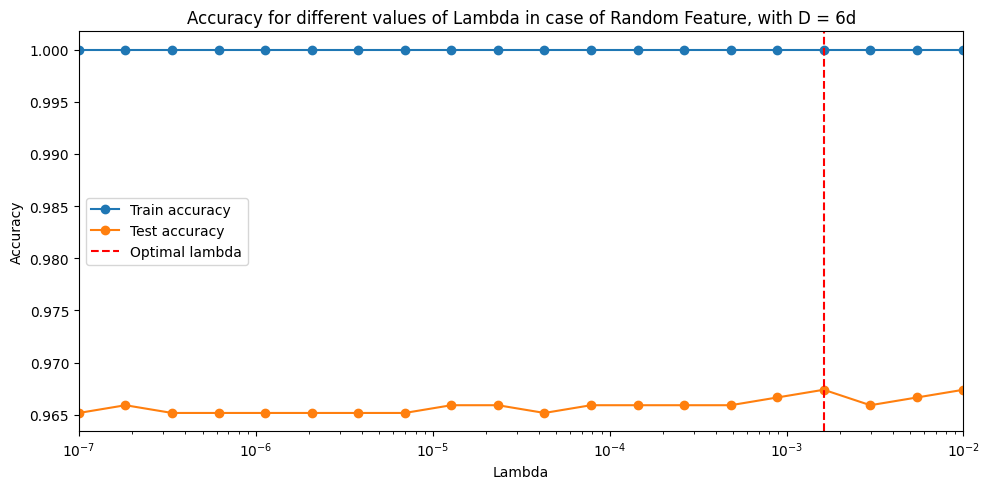

0.0001438449888287663
In this case, the optimal parameter is 0.00 and the accuracy on test set is 98.22%


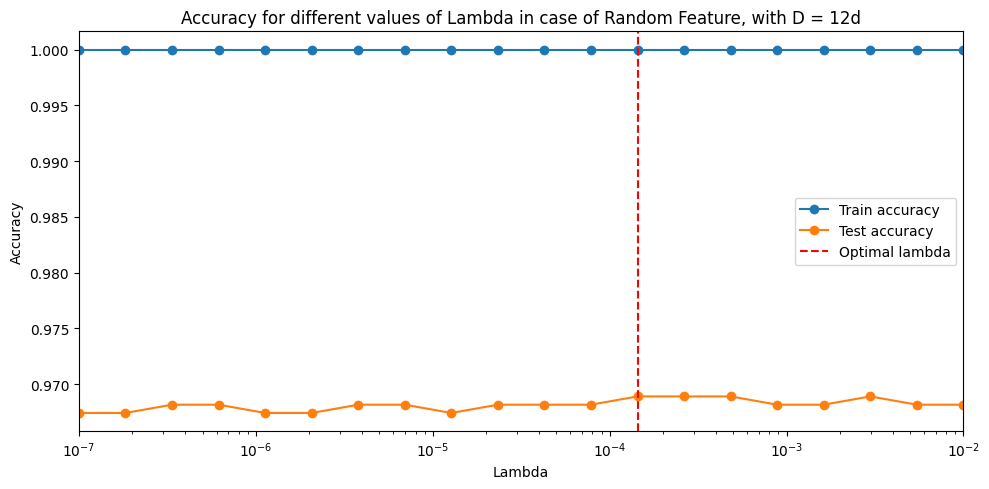

In [275]:
d = x_train.shape[1]
D_tab = np.array([3,6,12]) * d
param_grid = [
    {'logisticregression__C': 1 / np.logspace(-7, -2, 20)}  #'C' is the inverse of lambda
]

for D in D_tab:
    U_train, U_test = transform(x_train,x_test, D)
    
    logReg = LogisticRegression(penalty='l2', solver='liblinear', max_iter=100)
    tested_parameters, trainAcc, testAcc, cvOptParam,acc = function_evaluation(logReg,'logistic', param_grid, x_train=U_train, y_train = y_train, x_test=U_test)
    display_result(tested_parameters, 'Lambda', trainAcc, testAcc, cvOptParam, ' Lambda in case of Random Feature, with D = ' + str(int(D/d))+'d')


The accuracy on the test set increases in the same way as D. But as D increases, the size of the feature increase and the time complexity becomes higher and higher. It's good noticing that as D becomes bigger, the test accuracy approaches 1. 